# Gradient Descent

In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
def contourPlot(f, x_val, ax, sizex, sizey, fig):
    xv=np.linspace(-sizex,sizex,30)
    yv=np.linspace(-sizey,sizey,30)
    xx, yy = np.meshgrid(xv, yv)

    zz=f((xx, yy))
    cont=ax.contourf(xx, yy, zz, levels=20, corner_mask=True, cmap='RdGy')
    plt.colorbar(cont, ax=ax)
    plt.title("contour plot")
    ax.plot(x_val[0,1:], x_val[1,1:], "o-", label="iteration values")


## BACKTRACKING algorithm

In [163]:
def backtracking(f, grad_f, x,):
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

def backtracking_vander(f, grad_f, x,A, b, l=1):
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x,A,b,l), A, b, l) > f(x, A, b, l) - c * alpha * np.linalg.norm(grad_f(x,A,b,l)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

## Gradient Descent algorithm

In [164]:
def GD(f, grad_f, x0, tolf, tolx, kmax, a):
    backt=False
    if a==1:
        backt=True
    f_val=np.zeros((kmax,))
    err_val=np.zeros((kmax,))
    x_val=[]
    x_val.append(x0)

    k=0
    conditions=True
    while (conditions):
        if(k!=0):
            if(backt==True):
                a=backtracking(f, grad_f, x)
        x=x0-a*grad_f(x0)
        f_val[k]=f(x)
        err_val[k]=np.linalg.norm(grad_f(x))
        x_val.append(x)
        
        k+=1
        stopcond1=np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x_val[0])) 
        stopcond2=np.linalg.norm(x-x0) > tolx*np.linalg.norm(x_val[0])
        conditions=k<kmax-1 and stopcond1 and stopcond2
        x0=x

    f_val=f_val[:k]
    err_val=err_val[:k]
    return x_val, f_val, err_val

def GD_vander(f, grad_f, x0, tolf, tolx, kmax, A, b, l=1):
    a=1 
    f_val=np.zeros((kmax,))
    err_val=np.zeros((kmax,))

    x_val=[]
    x_val.append(x0)

    k=0
    conditions=True
    while (conditions):
        if(k!=0):
            a=backtracking_vander(f, grad_f, x, A, b, l)

        x=x0-a*grad_f(x0, A, b, l)

        f_val[k]=f(x, A, b, l)
        err_val[k]=np.linalg.norm(grad_f(x, A, b, l))
        x_val.append(x)

        k+=1
        stopcond1=np.linalg.norm(grad_f(x, A, b, l)) > tolf*np.linalg.norm(grad_f(x_val[0], A, b, l)) 
        stopcond2=np.linalg.norm(x-x0) > tolx*np.linalg.norm(x_val[0])
        conditions=k<kmax-1 and stopcond1 and stopcond2
        x0=x

    f_val=f_val[:k]
    err_val=err_val[:k]
    return x_val, f_val, err_val


1) Gradient descent for: $$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$$
Whose gradient is: $(2x_1 -6, 2x_2-2)$

'\nax1.plot(err_val)\nax1.set_xlabel("iteration")\nax1.set_ylabel("error")\nx_val=np.array(x_val)\nprint(x_val.shape)\ncontourPlot(f1, x_val.T, ax2, sizex=15, sizey=15, fig=fig)\nax2.plot(3,1, "o", label="true minimum")\nplt.legend()\n'

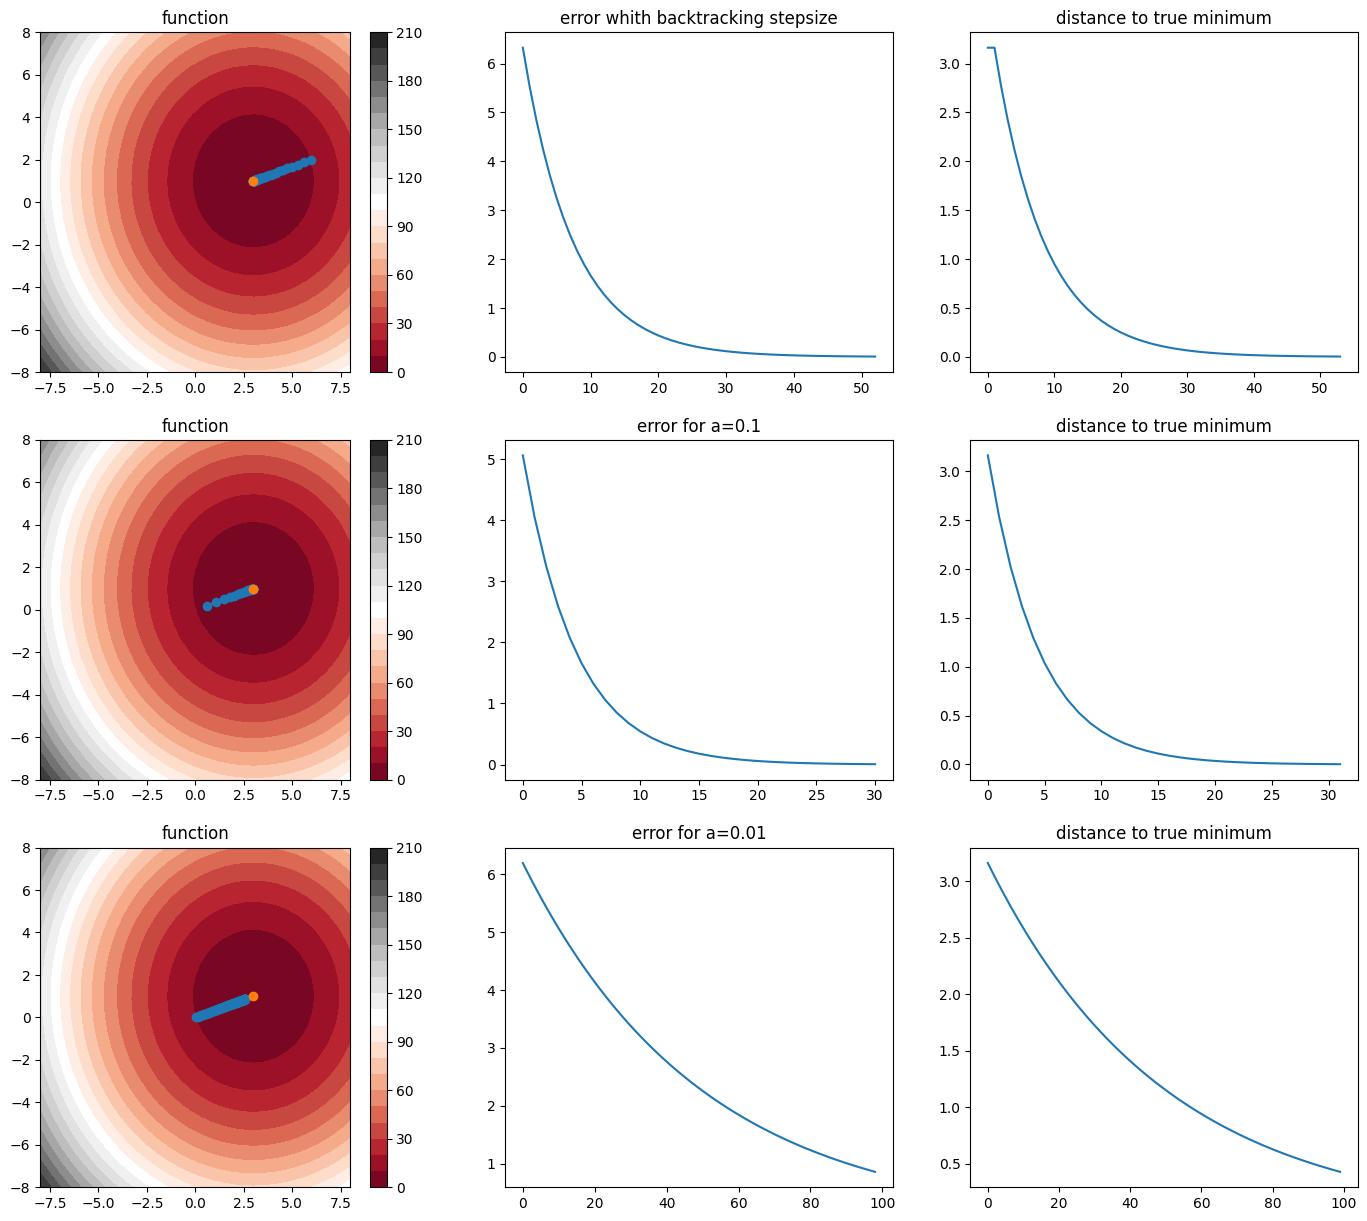

In [165]:
def f1(x):
    res=(x[0]-3)**2 + (x[1]-1)**2
    return res
def grad_f1(x):
    return np.array((2*x[0] -6, 2*x[1]-2))

a_vals=np.array((1, 0.1, 0.01))
x_true=np.array((3,1))
x0=np.array((0,0))
x_vals=[]
f_vals=[]
err_vals=[]
for a in a_vals:
    x_val, f_val, err_val=GD(f1, grad_f1, x0, 1e-3, 1e-3, 100, a)
    x_vals.append(x_val)
    f_vals.append(f_val)
    err_vals.append(err_val)

fig, ax = plt.subplots(3,3, figsize=(17,15))
for i in range(len(a_vals)):
    val=x_vals[i]
    contourPlot(f1, np.array(val).T, ax[i,0], sizex=8, sizey=8, fig=fig)

    ax[i,0].set_title(f"function")
    ax[i,0].plot(x_true[0], x_true[1], "o", label="true minimum")

    ax[i,1].plot(err_vals[i])
    if(a_vals[i]==1):
        ax[i,1].set_title("error whith backtracking stepsize")
    else:
        ax[i,1].set_title(f"error for a={a_vals[i]}")
    ax[i,2].plot(np.linalg.norm(x_vals[i]-x_true, axis=1, ord=2))
    ax[i,2].set_title("distance to true minimum")

2) Gradient descent for: $$f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$
Whose gradient is: $(20x_1 -20, 2x_2-4)$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


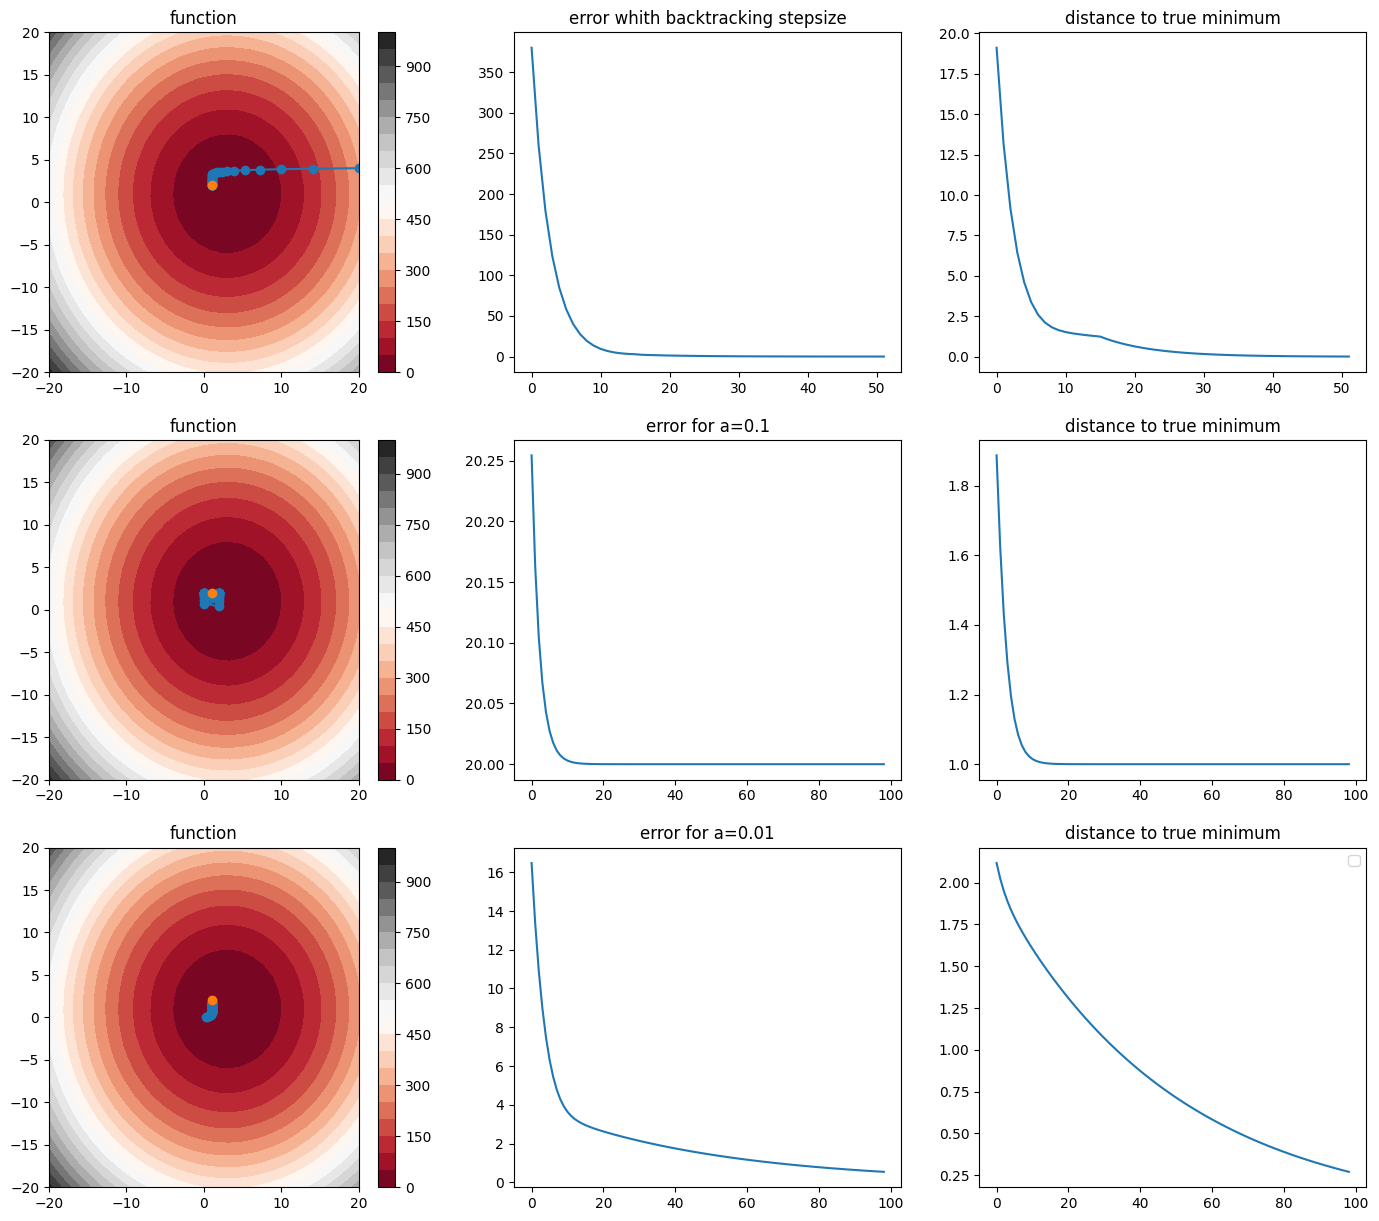

In [166]:
def f2(x):
    res=10*(x[0]-1)**2 + (x[1]-2)**2
    return res
def grad_f2(x):
    return np.array((20*x[0] -20, 2*x[1]-4))

x_true=np.array((1,2))
x0=np.array((0,0))
x_vals=[]
f_vals=[]
err_vals=[]
for a in a_vals:
    x_val, f_val, err_val=GD(f2, grad_f2, x0, 1e-3, 1e-3, 100, a)
    x_vals.append(x_val)
    f_vals.append(f_val)
    err_vals.append(err_val)

fig, ax = plt.subplots(3,3, figsize=(17,15))
for i in range(len(a_vals)):
    val=x_vals[i]
    contourPlot(f1, np.array(val).T, ax[i,0], sizex=20, sizey=20, fig=fig)
    ax[i,0].set_title(f"function")
    ax[i,0].plot(x_true[0], x_true[1], "o", label="true minimum")
    ax[i,1].plot(err_vals[i])
    if(a_vals[i]==1):
        ax[i,1].set_title("error whith backtracking stepsize")
    else:
        ax[i,1].set_title(f"error for a={a_vals[i]}")
    ax[i,2].plot(np.linalg.norm(x_vals[i][1:]-x_true, axis=1, ord=2))
    ax[i,2].set_title("distance to true minimum")

plt.legend()

3) Gradient descent for: $$f(x) = 1/2 *||Ax − b||_2^2$$
where $A ∈ R^{n×n}$ is the Vandermonde matrix associated with the vector $v ∈ R^n$ that contains n equispaced values in the interval [0, 1],<br> 
and $b ∈ R^n$ is computed by first setting xtrue=(1, 1, . . . , 1)T and then b = Axtrue.<br> 
Try for different values of n (e.g. n = 5, 10, 15, . . .).


Text(0.5, 1.0, 'Error of function 3 with different values of n')

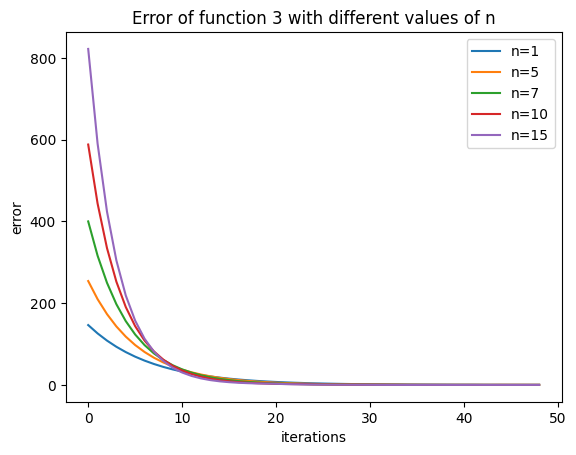

In [171]:
def f3(x,A,b, l=1):
    res=0.5*np.linalg.norm(A@x-b)**2
    return res
def grad_f3(x,A,b, l=1):
    return (A@x-b).T@A

#create vander matrix based on x_vander={1,2,3,...,n}
def vander(n):
    v=np.linspace(0,1,n)
    A=np.vander(v, n)
    #calculating b from x_true
    x_true=np.ones((n,))
    b=x_true@A

    #calculating x
    x=np.linalg.solve(A,b)
    return A, b, x

n_val=[1,5,7,10,15,20,50]
for n in range(5,10):
    A, b, x=vander(n)
    x0=np.zeros((n,))
    x_val3, f_val, err_val3=GD_vander(f3, grad_f3, x0, 1e-3, 1e-3, 50, A, b)
    #print(f"final value:{x_val3[-1]}")
    plt.plot(err_val3)
plt.xlabel("iterations")
plt.ylabel("error")
legend=["n="+str(i) for i in n_val]
plt.legend(legend)
plt.title("Error of function 3 with different values of n")

4) Gradient descent for: $$f(x) = 1/2 *||Ax − b||_2^2 + λ/2 *||x||_2^2$$
where A and b are the same of the exercise above, while λ is a fixed value in the interval [0, 1].<br>
Try different values for λ.

Text(0.5, 1.0, 'Error of function 4 with regularization (different l and fixed n=5)')

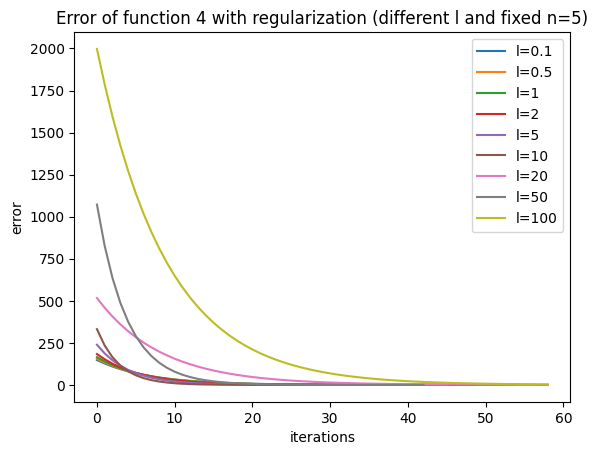

In [173]:
def f4(x,A,b, l):
    res=0.5*np.linalg.norm(A@x-b)**2 + (l/2)*np.linalg.norm(x)**2
    return res
def grad_f4(x,A,b, l):
    return (A@x-b).T@A + l*x

n=5
plt.xlabel("iterations")
plt.ylabel("error")
l_val=[0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
for i in l_val:
    l=i
    A, b, x=vander(n)
    x0=np.zeros((n,))
    x_val4, f_val, err_val4=GD_vander(f4, grad_f4, x0, 1e-3, 1e-3, 60, A, b, l)
    #print(f"final value:{x_val4[-1]}")
    plt.plot(err_val4)
legend=["l="+str(i) for i in l_val]
plt.legend(legend)
plt.title(f"Error of function 4 with regularization (different l and fixed n={n})")

5) Gradient descent for: $$f(x) = x^4+x^3-2x^2-2x$$
<br>

[0.9223191]


Text(0.5, 0.98, 'X0=0')

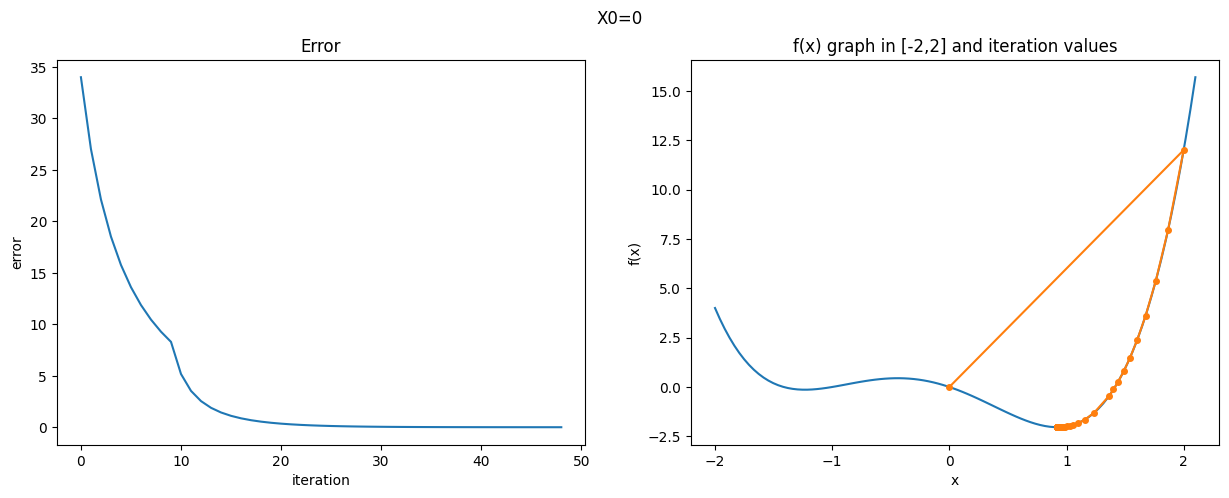

In [169]:
#fifth function
def f5(x):
    res=x**4+x**3-2*x**2-2*x
    return res
def grad_f5(x):
    return 4*x**3+3*x**2-4*x-2

x0=np.array((0,))
x_val5, f_val5, err_val5=GD(f5, grad_f5, x0, 1e-6, 1e-6, 50,1)
x_val5=np.array(x_val5)

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
ax1.plot(err_val5)
ax1.set_xlabel("iteration")
ax1.set_ylabel("error")
ax1.set_title("Error")
plt.xlabel("iterations")
plt.ylabel("error")

x=np.linspace(-2,2.1,100)
ax2.plot(x, f5(x))
ax2.plot(x_val5, f5(x_val5), "o-", markersize=4)
ax2.set_title("f(x) graph in [-2,2] and iteration values")
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
print(x_val5[-1])
fig.suptitle("X0=0")

[-1.23206211]


Text(0.5, 0.98, 'X0=-0.5')

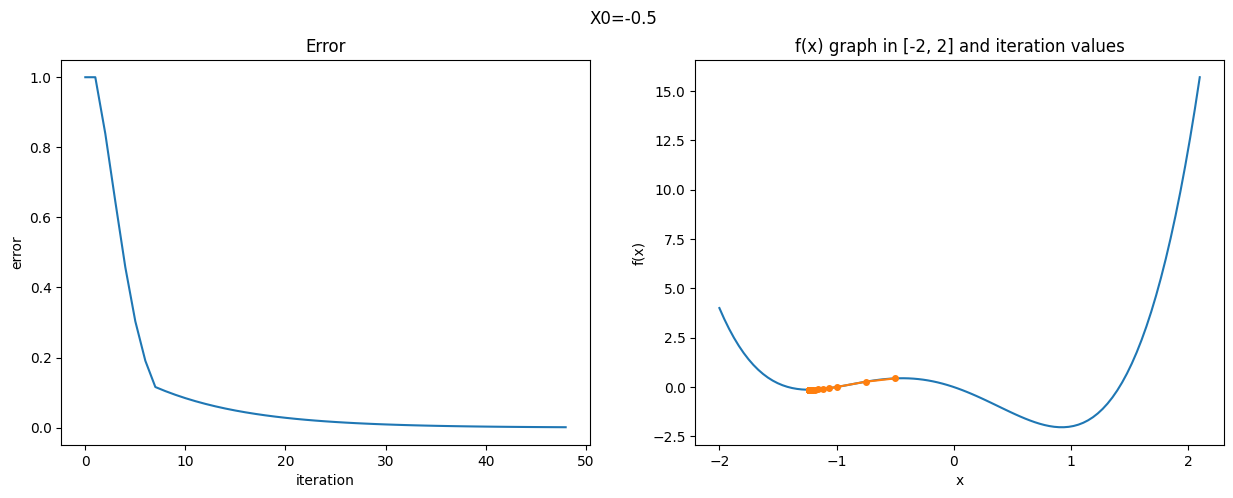

In [170]:
x0=np.array((-0.5,))
x_val5, f_val5, err_val5=GD(f5, grad_f5, x0, 1e-6, 1e-6, 50, 1)
x_val5=np.array(x_val5)

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
ax1.plot(err_val5)
ax1.set_xlabel("iteration")
ax1.set_ylabel("error")
ax1.set_title("Error")
plt.xlabel("iterations")
plt.ylabel("error")

x=np.linspace(-2,2.1,100)
ax2.plot(x, f5(x))
ax2.plot(x_val5, f5(x_val5), "o-", markersize=4)
ax2.set_title("f(x) graph in [-2, 2] and iteration values")
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
print(x_val5[-1])
fig.suptitle("X0=-0.5")